In [397]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/marketing/marketing_campaign (1).xlsx


In [398]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.inspection import permutation_importance

In [399]:
df = pd.read_excel('../input/marketing/marketing_campaign (1).xlsx')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [400]:
df.drop(['AcceptedCmp2','AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5','Response', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [401]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [402]:
#Checking the number of null values present in the data set. 
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp1            0
Complain                0
dtype: int64

In [403]:
#Now we are calculating the percentage of null values present in the data set(column wise).
print('Percentage of Null values with respect to columns in the dataset')
100* df.isnull().sum()/len(df)

Percentage of Null values with respect to columns in the dataset


ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp1           0.000000
Complain               0.000000
dtype: float64

<AxesSubplot:>

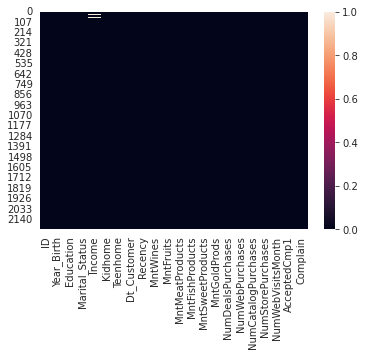

In [404]:
sns.heatmap(df.isnull())

In [405]:
# fill the null values in numerical columns with average specific to certain column
# fill in the missing data in the columns according to the Education average.
unique_Education = pd.unique(df.Education)

# find Income averages in Education specific
# Equalize the average Income values to the missing values in Income specific to Education
temp_data = df.copy()  # set temp_data variable to avoid losing real data
columns = ['Income'] # it can be add more column
for c in unique_Education:
    
    # create Education filter
    Education_filtre = temp_data.Education == c
    # filter data by Education
    filtered_data = temp_data[Education_filtre]
    
    # find average for Income in specific to Education
    for s in columns:
        mean = np.round(np.mean(filtered_data[s]), 2)
        if ~np.isnan(mean): # if there if average specific to Education
            filtered_data[s] = filtered_data[s].fillna(mean)
            print(f"Missing Value in {s} column filled with {mean} when Education:{c}")
        else: # find average for all data if no average in specific to Education
            all_data_mean = np.round(np.mean(df[s]), 2)
            filtered_data[s] = filtered_data[s].fillna(all_data_mean)
            print(f"Missing Value in {s} column filled with {all_data_mean}")
    # Synchronize data filled with missing values in Income to data temporary            
    temp_data[Education_filtre] = filtered_data

# equate the deprecated temporary data to the real data variable
df = temp_data.copy() 

Missing Value in Income column filled with 52720.37 when Education:Graduation
Missing Value in Income column filled with 56145.31 when Education:PhD
Missing Value in Income column filled with 52917.53 when Education:Master
Missing Value in Income column filled with 20306.26 when Education:Basic
Missing Value in Income column filled with 47633.19 when Education:2n Cycle



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [406]:
# check null data
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp1           0
Complain               0
dtype: int64

In [470]:
#checking dataframe statitics
df.describe()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,Complain,Year,Month,Age
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,2.393750,3.729911,51758.999304,0.444196,0.506250,49.109375,295.352679,24.774107,...,2.325000,4.084821,2.662054,5.790179,5.316518,0.064286,0.009375,2013.028125,6.467411,0.992857
std,3246.662198,11.984069,1.124797,1.076277,19642.729758,0.538398,0.544538,28.962453,314.151003,34.857790,...,1.932238,2.778714,2.923101,3.250958,2.426645,0.245316,0.096391,0.684554,3.486695,0.708490
min,0.000000,1893.000000,0.000000,0.000000,19101.050000,0.000000,0.000000,0.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000,1.000000,0.000000
25%,2828.250000,1959.000000,2.000000,3.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,...,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,2013.000000,3.000000,0.000000
50%,5458.500000,1970.000000,2.000000,4.000000,51609.500000,0.000000,0.000000,49.000000,173.500000,8.000000,...,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,2013.000000,6.000000,1.000000
75%,8427.750000,1977.000000,3.000000,5.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,...,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,2013.000000,10.000000,1.000000
max,11191.000000,1996.000000,4.000000,7.000000,83927.000000,2.000000,2.000000,99.000000,1000.000000,123.000000,...,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,2014.000000,12.000000,2.000000


In [411]:
# creating Year, Month, Age column for further analysis
from datetime import datetime as dt

# convert the 'Date' column to datetime format
df['Dt_Customer']= pd.to_datetime(df['Dt_Customer'])

# create Year, Month, Day columns
df['Year'] = df["Dt_Customer"].dt.year
df['Month'] = df["Dt_Customer"].dt.month

#create Age column 
age = []
for i in df["Year_Birth"]:
    if i <= 1959:
        age.append("Elderly")
    elif i > 1959 and i <=1977:
        age.append("MiddleAge")
    else:
        age.append("Young")
df["Age"] = age

# drop original date column 
df.drop(['Dt_Customer'], axis=1, inplace=True)

**Exploratory Data Analysis**

In [412]:
df.shape

(2240, 24)

In [413]:
# statistical information about numerical data
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,Complain,Year,Month
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52253.592339,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.064286,0.009375,2013.028125,6.467411
std,3246.662198,11.984069,25039.085599,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.245316,0.096391,0.684554,3.486695
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000,1.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,2013.000000,3.000000
50%,5458.500000,1970.000000,51609.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,2013.000000,6.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,2013.000000,10.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,2014.000000,12.000000


In [414]:
# statistical information about categorical data
df[["Education", "Marital_Status"]].describe()

,Education,Marital_Status
count,2240,2240
unique,5,8
top,Graduation,Married
freq,1127,864


In [415]:
def annot_plot(ax,w,h):                                    # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))

In [416]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'Complain',
       'Year', 'Month', 'Age'],
      dtype='object')

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


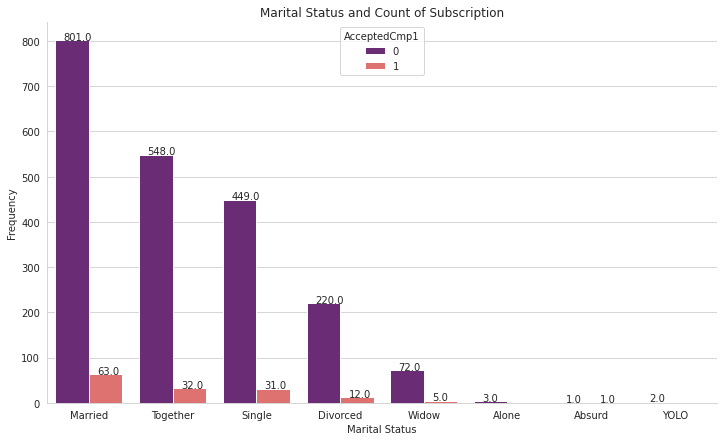

In [417]:
# Number of sample according to MaritalStatus

plt.figure(figsize=(12,7))
ax = sns.countplot("Marital_Status", data = df, palette='magma',hue='AcceptedCmp1',order=df['Marital_Status'].value_counts().index)
plt.title('Marital Status and Count of Subscription')
plt.ylabel('Frequency')
plt.xlabel("Marital Status")
annot_plot(ax,0.1,1)
plt.show()



Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


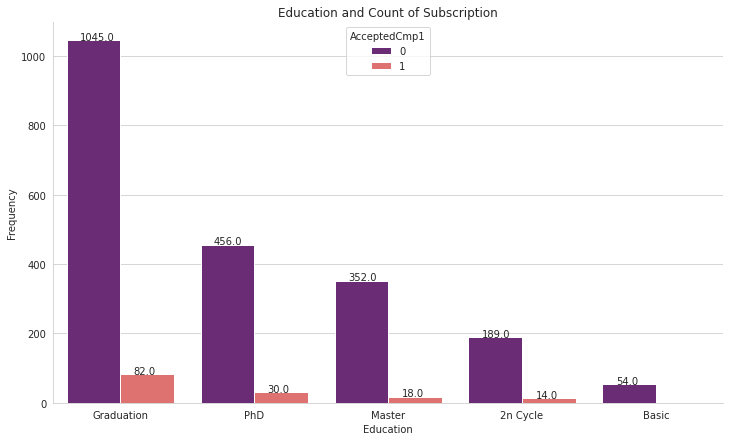

In [418]:
# Number of sample according to Education

plt.figure(figsize=(12,7))
ax = sns.countplot("Education", data = df, palette='magma',hue='AcceptedCmp1',order=df['Education'].value_counts().index)
plt.title('Education and Count of Subscription')
plt.ylabel('Frequency')
plt.xlabel("Education")
annot_plot(ax,0.1,1)
plt.show()

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


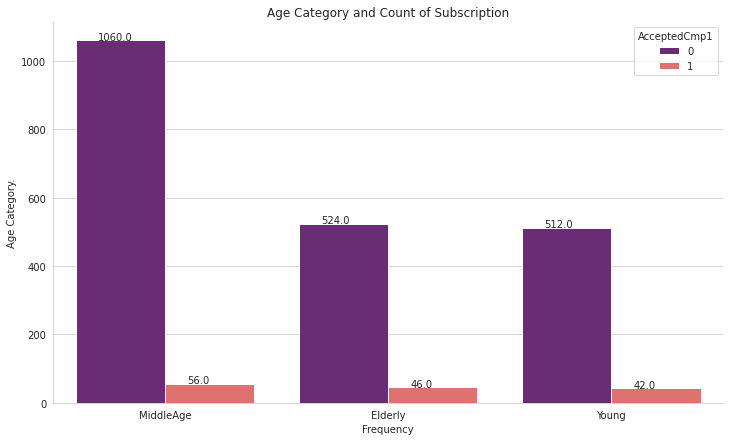

In [419]:
# Number of sample according to Year_Birth

plt.figure(figsize=(12,7))
ax = sns.countplot("Age", data = df, palette='magma',hue='AcceptedCmp1',order=df['Age'].value_counts().index)
plt.title('Age Category and Count of Subscription')
plt.ylabel('Age Category.')
plt.xlabel("Frequency")
annot_plot(ax,0.1,1)
plt.show()

In [420]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'Complain',
       'Year', 'Month', 'Age'],
      dtype='object')

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


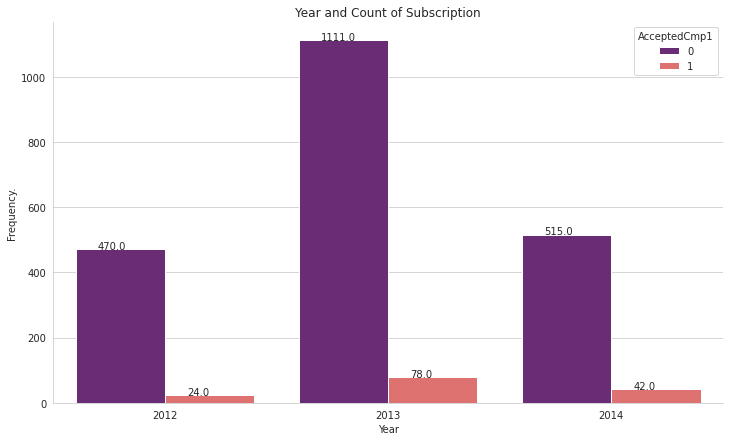

In [421]:
# Number of sample according to Year

plt.figure(figsize=(12,7))
ax = sns.countplot("Year", data = df, palette='magma',hue='AcceptedCmp1')
plt.title('Year and Count of Subscription')
plt.ylabel('Frequency.')
plt.xlabel("Year")
annot_plot(ax,0.1,1)
plt.show()

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


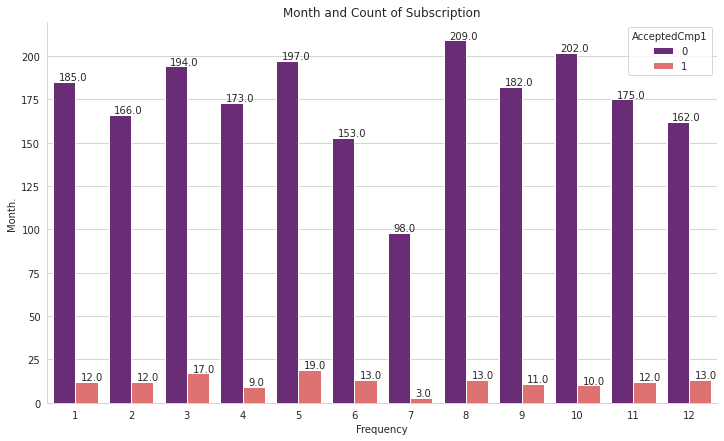

In [422]:
# Number of sample according to Month

plt.figure(figsize=(12,7))
ax = sns.countplot("Month", data = df, palette='magma',hue='AcceptedCmp1')
plt.title('Month and Count of Subscription')
plt.ylabel('Month.')
plt.xlabel("Frequency")
annot_plot(ax,0.1,1)
plt.show()

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


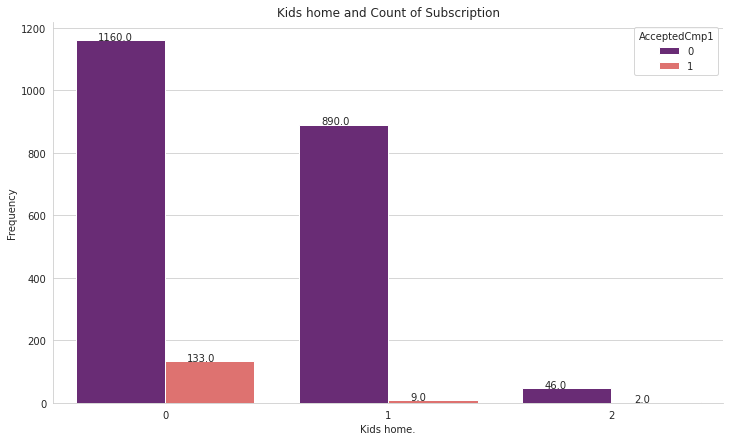

In [423]:
# Number of sample according to Kidhome

plt.figure(figsize=(12,7))
ax = sns.countplot("Kidhome", data = df, palette='magma',hue='AcceptedCmp1')
plt.title('Kids home and Count of Subscription')
plt.ylabel('Frequency')
plt.xlabel("Kids home.")
annot_plot(ax,0.1,1)
plt.show()

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


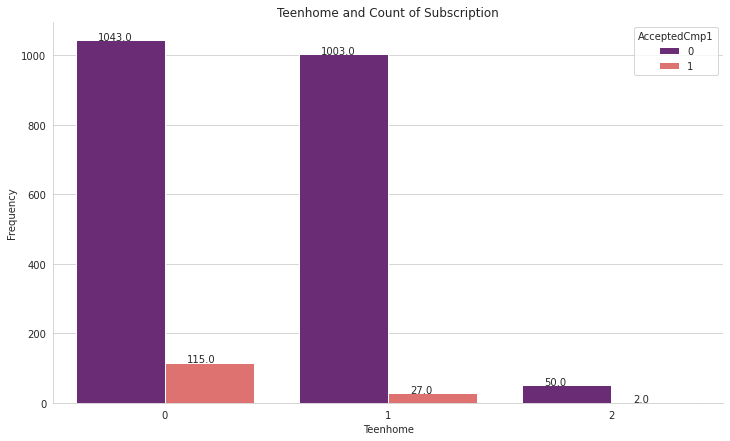

In [424]:
# Number of sample according to Kidhome

plt.figure(figsize=(12,7))
ax = sns.countplot("Teenhome", data = df, palette='magma',hue='AcceptedCmp1')
plt.title('Teenhome and Count of Subscription')
plt.ylabel('Frequency')
plt.xlabel("Teenhome")
annot_plot(ax,0.1,1)
plt.show()

<Figure size 1008x2880 with 0 Axes>

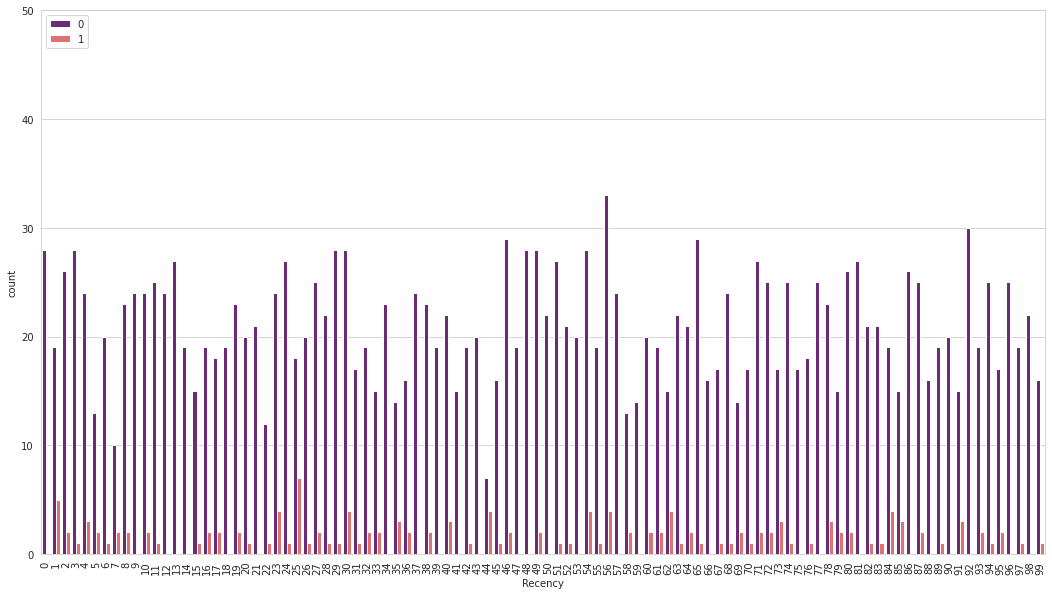

In [425]:
plt.figure(figsize=(14,40))
sns.set_style('whitegrid')
plt.figure(figsize= (18,10))
plt.ticklabel_format(style='plain')
plt.xticks(rotation = 90 ,fontsize = 10)
plt.yticks(fontsize = 10)
plt.ylim(0,50,10)
plt.xlim(0,50,10)
sns.countplot(x='Recency',palette = 'magma',data=df,hue = 'AcceptedCmp1')

plt.legend();
plt.show()

In [426]:
df['Recency'].nunique()

100

In [427]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'Complain',
       'Year', 'Month', 'Age'],
      dtype='object')

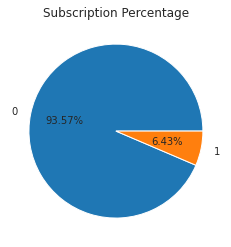

In [428]:
# campaign accept rates 
campaign = ["AcceptedCmp1"]
for i in campaign:
    accept_rate = (df.groupby(i).size() / df[i].count()) * 100
    plt.title(f"Subscription Percentage")
    plt.pie(accept_rate, labels=df[i].unique(), autopct='%1.2f%%',labeldistance=1.15, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' })
    plt.show()

In [429]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'Complain',
       'Year', 'Month', 'Age'],
      dtype='object')

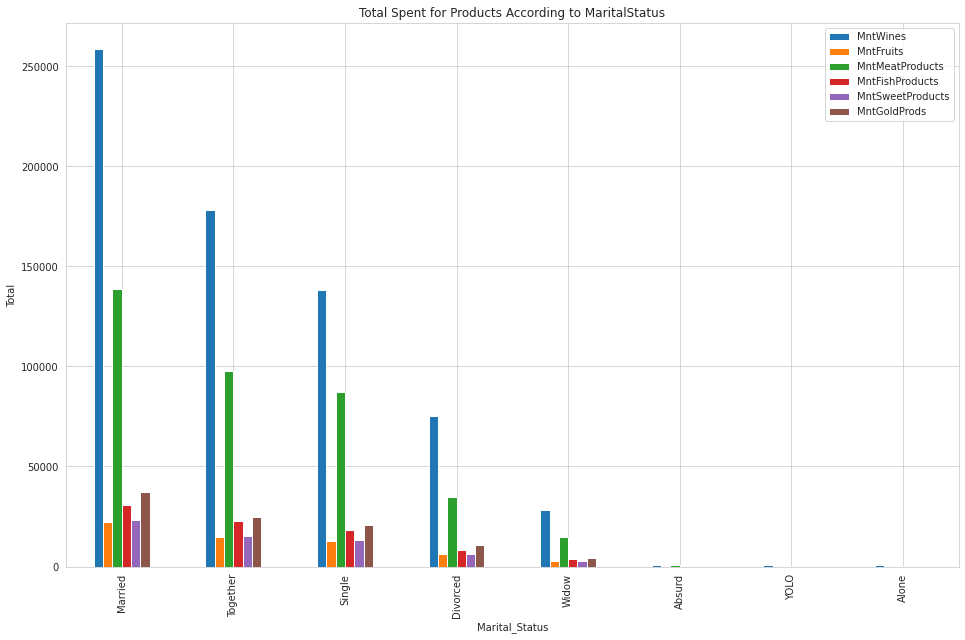

In [430]:
# total spent according to maritalstatus
data = df[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds", 'Marital_Status']].groupby(["Marital_Status"]).sum().reset_index().sort_values(by=["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"], ascending=False)
data.plot(x="Marital_Status", ylabel= "Total", kind="bar", figsize=(16, 10), legend=True, title="Total Spent for Products According to MaritalStatus")
plt.show()

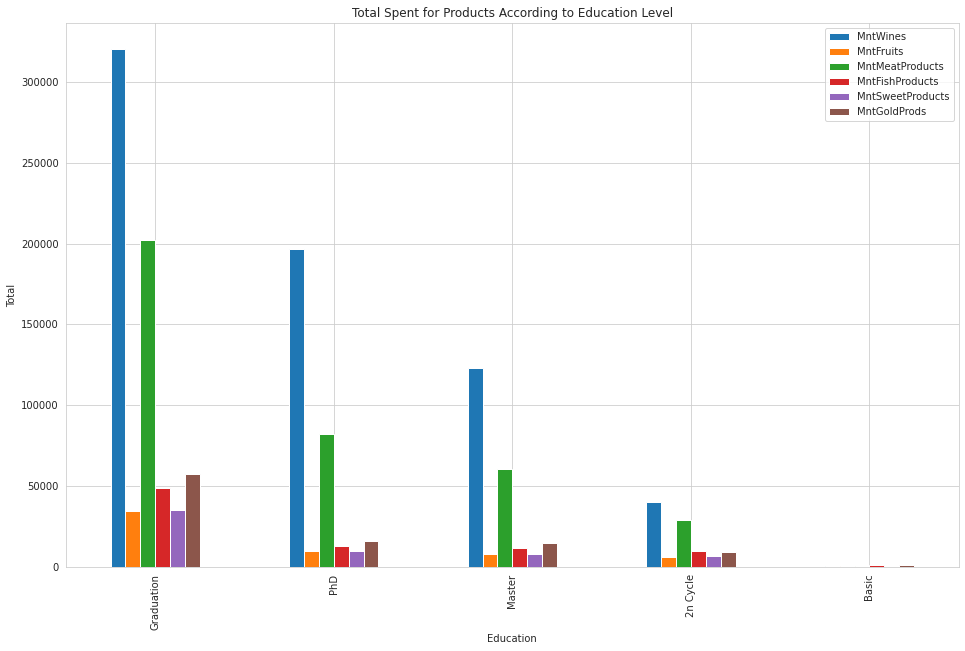

In [431]:
# total spent according to Education
data = df[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds", 'Education']].groupby(["Education"]).sum().reset_index().sort_values(by=["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"], ascending=False)
data.plot(x="Education", ylabel= "Total", kind="bar", figsize=(16, 10), legend=True, title="Total Spent for Products According to Education Level")
plt.show()

In [432]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'Complain',
       'Year', 'Month', 'Age'],
      dtype='object')

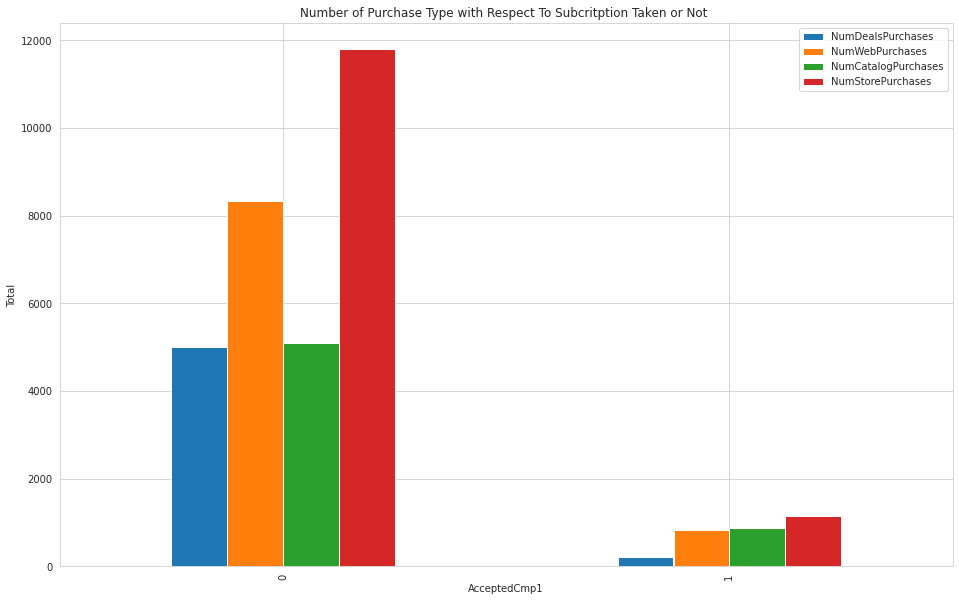

In [433]:
# purchase type according to subscription acceptance
data = df[["AcceptedCmp1",'NumDealsPurchases', "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]].groupby(["AcceptedCmp1"]).sum().reset_index().sort_values(by=['NumDealsPurchases',"NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"], ascending=False)
data.plot(x="AcceptedCmp1", ylabel= "Total", kind="bar", figsize=(16, 10), legend=True, grid=True, 
        title="Number of Purchase Type with Respect To Subcritption Taken or Not ")
plt.show()

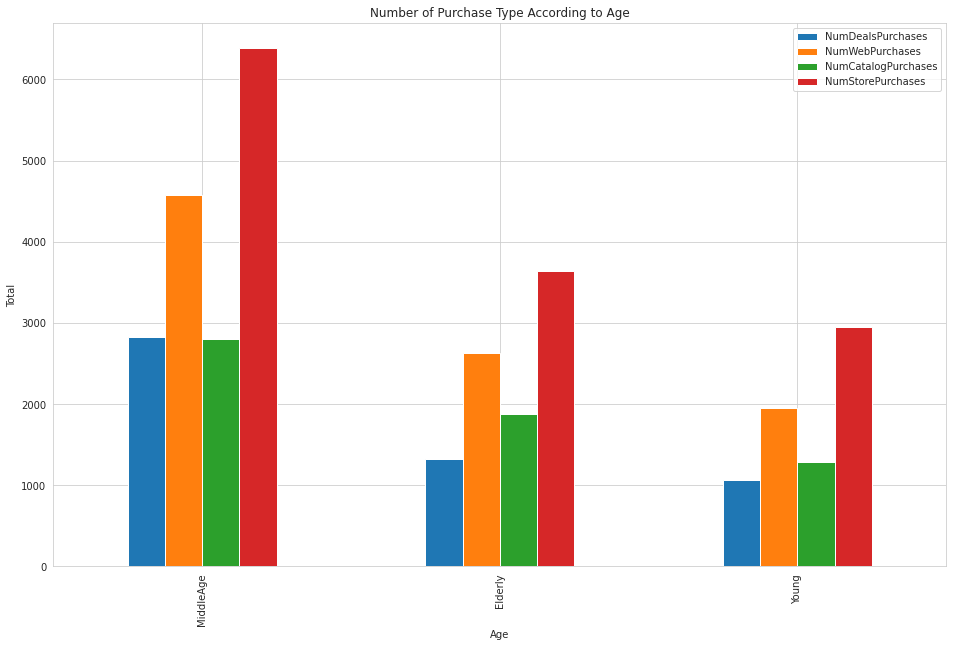

In [434]:
# purchase type according to age
data = df[["Age",'NumDealsPurchases', "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]].groupby(["Age"]).sum().reset_index().sort_values(by=['NumDealsPurchases',"NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"], ascending=False)
data.plot(x="Age", ylabel= "Total", kind="bar", figsize=(16, 10), legend=True, grid=True, 
        title="Number of Purchase Type According to Age")
plt.show()

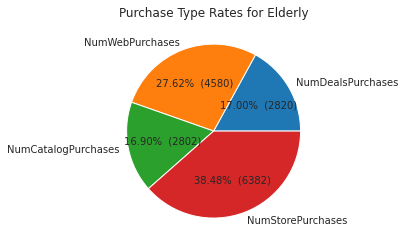

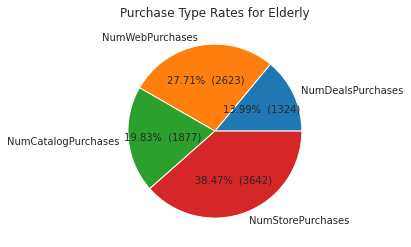

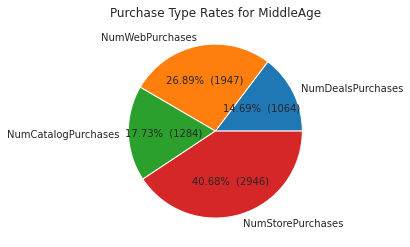

In [435]:
# Purchase Type Rates according to Age
# set target row index
target_row_index = [0, 1, 2]

# make the pie circular by setting the aspect ratio to 1
plt.figure(figsize=plt.figaspect(1))

# specify data for chart
values = data.iloc[target_row_index, 1:]
labels = data.columns[1:]

# define function to format values on chart
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{pct:.2f}%  ({val:d})'
    return my_autopct

for i in target_row_index:
    values = data.iloc[i, 1:]
    labels = data.columns[1:]
    plt.title(f"Purchase Type Rates for {df.loc[i].Age}")
    plt.pie(values, labels=labels, autopct=make_autopct(values))
    plt.show()
    

In [436]:
df['Complain'].value_counts()

0    2219
1      21
Name: Complain, dtype: int64

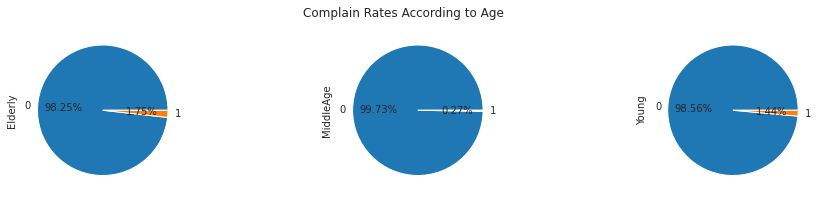

In [437]:
# complain rates according to age
data = pd.crosstab(index= df["Complain"] , columns=df['Age'])
data.plot(x="Complain", kind="pie", figsize=(16, 3), legend=False, subplots=True, autopct='%1.2f%%',title="Complain Rates According to Age")
plt.show()

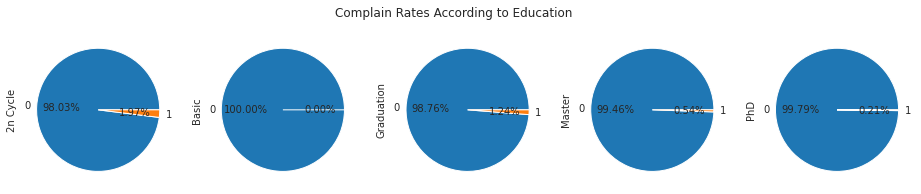

In [438]:
data = pd.crosstab(index= df["Complain"] , columns=df['Education'])
data.plot(x="Complain", kind="pie", figsize=(16, 3), legend=False, subplots=True, autopct='%1.2f%%',
        title="Complain Rates According to Education")
plt.show()


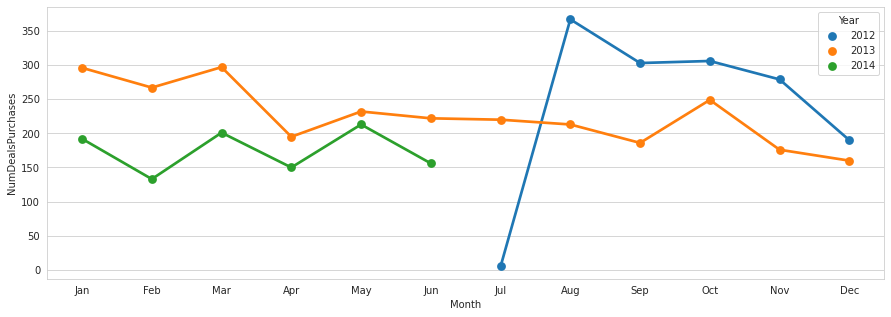

In [439]:
# number of purchases made with discount according to month
custom_dict = {'Jan':0, 'Feb':1, 'Mar':2, 'Apr':3, 'May':4, 'Jun':5,
               'Jul':6, 'Aug':7, 'Sep':8, 'Oct':9, 'Nov':10, 'Dec':11}
temp_data = df.copy()
temp_data.Month.replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], inplace=True)
data = temp_data[['Month', 'Year', "NumDealsPurchases"]].groupby(["Year","Month"]).sum().reset_index().sort_values(by=['Year','Month', 'NumDealsPurchases'], ascending=False)
data = data.iloc[data['Month'].map(custom_dict).argsort()]
f, ax=plt.subplots(figsize=(15, 5))
sns.pointplot(x='Month', y="NumDealsPurchases", data=data, hue="Year")
plt.show()

In [440]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'Complain',
       'Year', 'Month', 'Age'],
      dtype='object')

**Feature Engineering**

In [445]:
le=LabelEncoder()#encode the education column
label=le.fit_transform(df['Education'])
label
df.drop('Education',axis=1)
df['Education']=label

In [446]:
df['Education'].value_counts()

2    1127
4     486
3     370
0     203
1      54
Name: Education, dtype: int64

In [447]:
label1=le.fit_transform(df['Marital_Status'])#encode the marital_Status column
df.drop('Marital_Status',axis=1)
df['Marital_Status']=label1
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,Complain,Year,Month,Age
0,5524,1957,2,4,58138.0,0,0,58,635,88,...,3,8,10,4,7,0,0,2012,9,Elderly
1,2174,1954,2,4,46344.0,1,1,38,11,1,...,2,1,1,2,5,0,0,2014,3,Elderly
2,4141,1965,2,5,71613.0,0,0,26,426,49,...,1,8,2,10,4,0,0,2013,8,MiddleAge
3,6182,1984,2,5,26646.0,1,0,26,11,4,...,2,2,0,4,6,0,0,2014,2,Young
4,5324,1981,4,3,58293.0,1,0,94,173,43,...,5,5,3,6,5,0,0,2014,1,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,3,61223.0,0,1,46,709,43,...,2,9,3,4,5,0,0,2013,6,MiddleAge
2236,4001,1946,4,5,64014.0,2,1,56,406,0,...,7,8,2,5,7,1,0,2014,6,Elderly
2237,7270,1981,2,2,56981.0,0,0,91,908,48,...,1,2,3,13,6,0,0,2014,1,Young
2238,8235,1956,3,5,69245.0,0,1,8,428,30,...,2,6,5,10,3,0,0,2014,1,Elderly


In [448]:
#dropping unwanted features
df.drop(['Year_Birth','ID'],axis=1)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,Complain,Year,Month,Age
0,2,4,58138.0,0,0,58,635,88,546,172,...,3,8,10,4,7,0,0,2012,9,Elderly
1,2,4,46344.0,1,1,38,11,1,6,2,...,2,1,1,2,5,0,0,2014,3,Elderly
2,2,5,71613.0,0,0,26,426,49,127,111,...,1,8,2,10,4,0,0,2013,8,MiddleAge
3,2,5,26646.0,1,0,26,11,4,20,10,...,2,2,0,4,6,0,0,2014,2,Young
4,4,3,58293.0,1,0,94,173,43,118,46,...,5,5,3,6,5,0,0,2014,1,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,3,61223.0,0,1,46,709,43,182,42,...,2,9,3,4,5,0,0,2013,6,MiddleAge
2236,4,5,64014.0,2,1,56,406,0,30,0,...,7,8,2,5,7,1,0,2014,6,Elderly
2237,2,2,56981.0,0,0,91,908,48,217,32,...,1,2,3,13,6,0,0,2014,1,Young
2238,3,5,69245.0,0,1,8,428,30,214,80,...,2,6,5,10,3,0,0,2014,1,Elderly


In [449]:
label1=le.fit_transform(df['Age'])#encode the marital_Status column
df.drop('Age',axis=1)
df['Age']=label1
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,Complain,Year,Month,Age
0,5524,1957,2,4,58138.0,0,0,58,635,88,...,3,8,10,4,7,0,0,2012,9,0
1,2174,1954,2,4,46344.0,1,1,38,11,1,...,2,1,1,2,5,0,0,2014,3,0
2,4141,1965,2,5,71613.0,0,0,26,426,49,...,1,8,2,10,4,0,0,2013,8,1
3,6182,1984,2,5,26646.0,1,0,26,11,4,...,2,2,0,4,6,0,0,2014,2,2
4,5324,1981,4,3,58293.0,1,0,94,173,43,...,5,5,3,6,5,0,0,2014,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,3,61223.0,0,1,46,709,43,...,2,9,3,4,5,0,0,2013,6,1
2236,4001,1946,4,5,64014.0,2,1,56,406,0,...,7,8,2,5,7,1,0,2014,6,0
2237,7270,1981,2,2,56981.0,0,0,91,908,48,...,1,2,3,13,6,0,0,2014,1,2
2238,8235,1956,3,5,69245.0,0,1,8,428,30,...,2,6,5,10,3,0,0,2014,1,0


<AxesSubplot:>

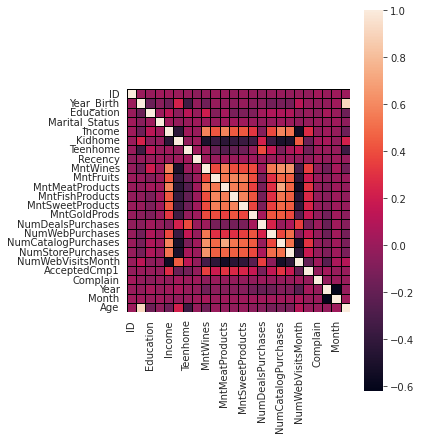

In [450]:
corr = df.select_dtypes(include=['float64','int64']).iloc[:,0:].corr()
plt.figure(figsize=(5,7))
sns.heatmap(corr,vmax=1, square=True,linecolor="black",linewidths=0.7)

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Ple

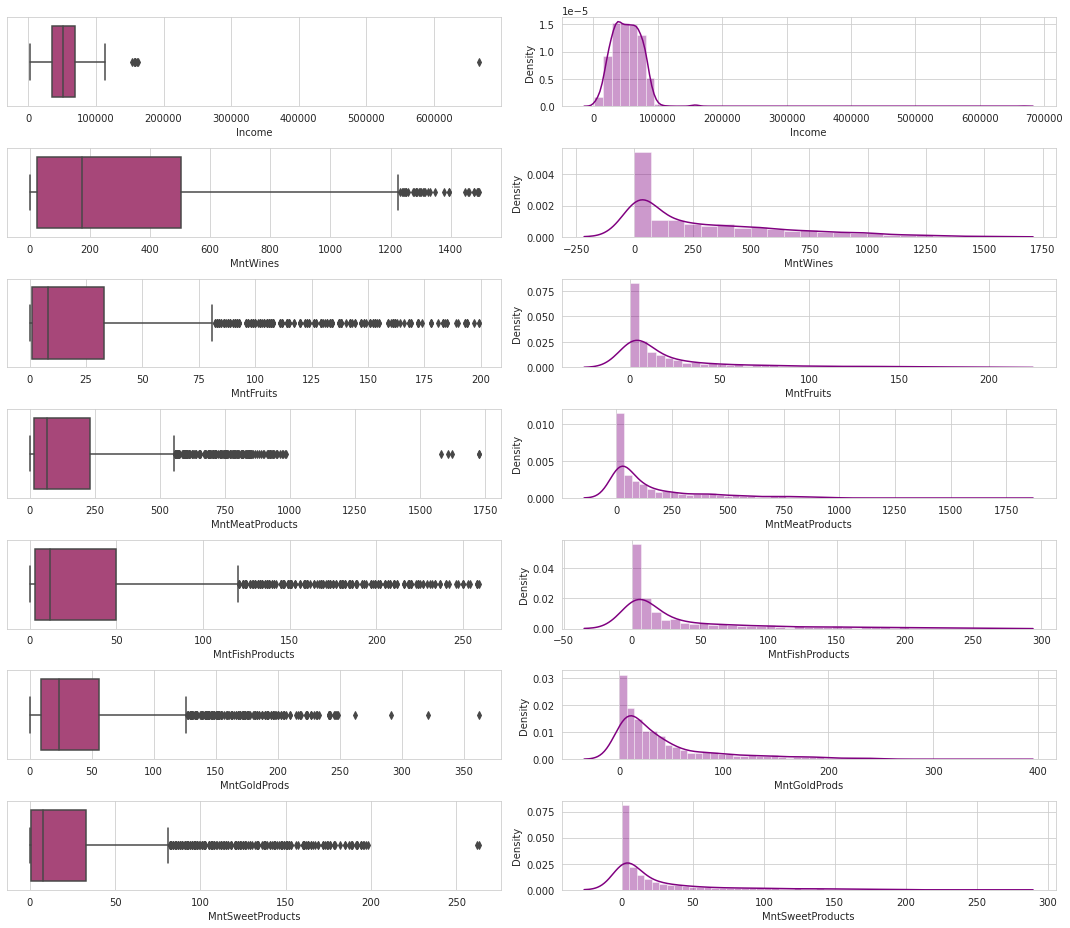

In [451]:
# Exploring the range and distribution of numerical Variables for outlier detection

fig, ax = plt.subplots(7, 2, figsize = (15, 13))



sns.boxplot(x= df["Income"], ax = ax[0,0],palette='magma')
sns.distplot(df['Income'], ax = ax[0,1],color='purple')

sns.boxplot(x= df["MntWines"], ax = ax[1,0],palette='magma',)
sns.distplot(df['MntWines'], ax = ax[1,1],color='purple')

sns.boxplot(x= df["MntFruits"], ax = ax[2,0],palette='magma')
sns.distplot(df['MntFruits'], ax = ax[2,1],color='purple')

sns.boxplot(x= df["MntMeatProducts"], ax = ax[3,0],palette='magma')
sns.distplot(df['MntMeatProducts'], ax = ax[3,1],color='purple')

sns.boxplot(x= df["MntFishProducts"], ax = ax[4,0],palette='magma')
sns.distplot(df['MntFishProducts'], ax = ax[4,1],color='purple')

sns.boxplot(x= df["MntGoldProds"], ax = ax[5,0],palette='magma')
sns.distplot(df['MntGoldProds'], ax = ax[5,1],color='purple')

sns.boxplot(x= df["MntSweetProducts"], ax = ax[6,0],palette='magma')
sns.distplot(df['MntSweetProducts'], ax = ax[6,1],color='purple')
        


plt.tight_layout()

In [452]:
columns = ['Income','MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
for i in columns:
    df[i]=df[i].clip(lower=df[i].quantile(0.05), upper=df[i].quantile(0.95))

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Ple

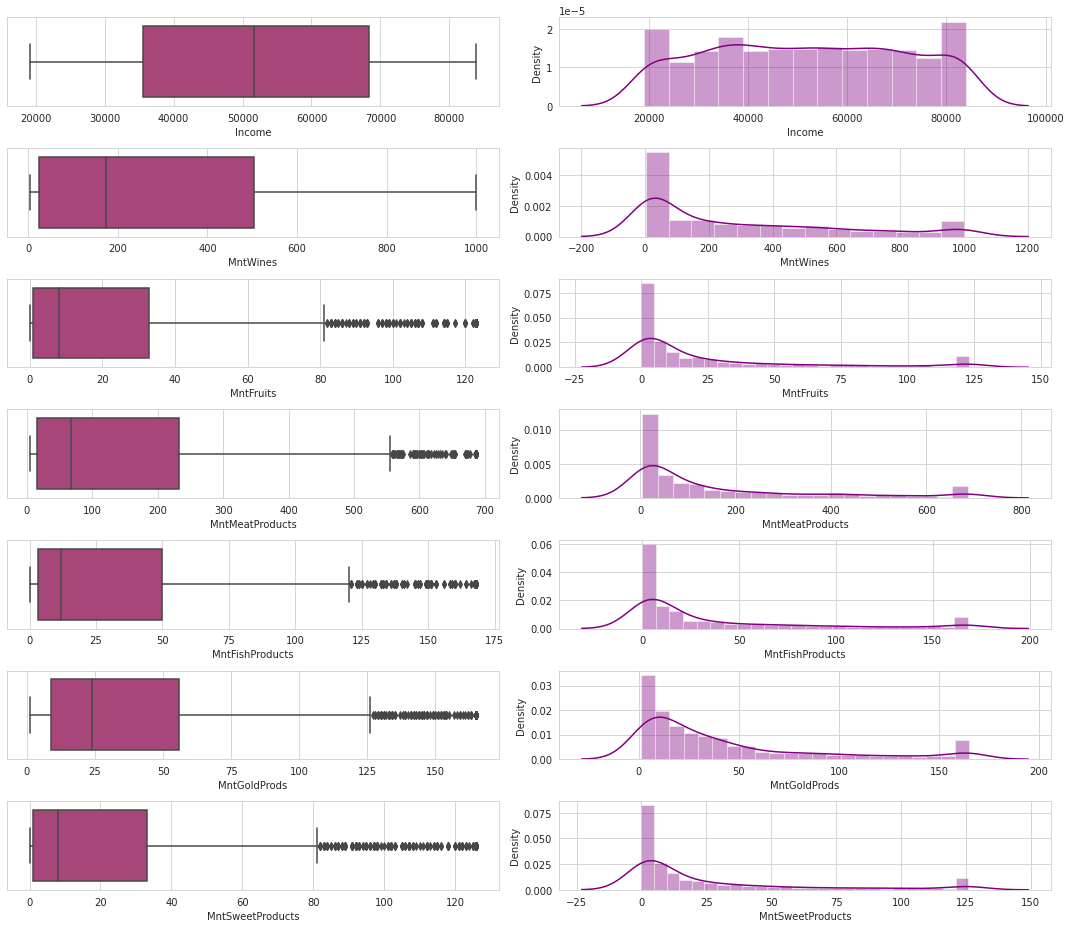

In [453]:
# Visualizing post removing outliers

fig, ax = plt.subplots(7, 2, figsize = (15, 13))



sns.boxplot(x= df["Income"], ax = ax[0,0],palette='magma')
sns.distplot(df['Income'], ax = ax[0,1],color='purple')

sns.boxplot(x= df["MntWines"], ax = ax[1,0],palette='magma',)
sns.distplot(df['MntWines'], ax = ax[1,1],color='purple')

sns.boxplot(x= df["MntFruits"], ax = ax[2,0],palette='magma')
sns.distplot(df['MntFruits'], ax = ax[2,1],color='purple')

sns.boxplot(x= df["MntMeatProducts"], ax = ax[3,0],palette='magma')
sns.distplot(df['MntMeatProducts'], ax = ax[3,1],color='purple')

sns.boxplot(x= df["MntFishProducts"], ax = ax[4,0],palette='magma')
sns.distplot(df['MntFishProducts'], ax = ax[4,1],color='purple')

sns.boxplot(x= df["MntGoldProds"], ax = ax[5,0],palette='magma')
sns.distplot(df['MntGoldProds'], ax = ax[5,1],color='purple')

sns.boxplot(x= df["MntSweetProducts"], ax = ax[6,0],palette='magma')
sns.distplot(df['MntSweetProducts'], ax = ax[6,1],color='purple')
        


plt.tight_layout()

**Modeling Stage**

In [454]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'Complain',
       'Year', 'Month', 'Age'],
      dtype='object')

In [455]:
y=df['AcceptedCmp1']#specify the dependent variable and independent variable
x=df.drop(['AcceptedCmp1'],axis=1)

In [456]:
#deviding the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [457]:
#size of train and test data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1568, 23)
(1568,)
(672, 23)
(672,)


In [458]:
#import logistic model
x1=sm.add_constant(x_train)
logr_model=sm.Logit(y_train,x_train)
logr_fit=logr_model.fit()
print(logr_fit.summary())

         Current function value: 0.148673
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:           AcceptedCmp1   No. Observations:                 1568
Model:                          Logit   Df Residuals:                     1545
Method:                           MLE   Df Model:                           22
Date:                Mon, 21 Nov 2022   Pseudo R-squ.:                  0.3822
Time:                        03:39:06   Log-Likelihood:                -233.12
converged:                      False   LL-Null:                       -377.33
Covariance Type:            nonrobust   LLR p-value:                 2.694e-48
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
ID                  -2.426e-05   3.89e-05     -0.623      0.533      -0.000     5.2e-05
Year_Birth             -0.0055      0.

Maximum Likelihood optimization failed to converge. Check mle_retvals


In [468]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

cm=confusion_matrix(y_test, y_pred)#confusion matrix for the logistic model prediction
print('Logistic Regression Results')
ans = accuracy_score(y_test, y_pred)
ans = round(ans*100,3)
print('Acurracy score of Logistic Regression Model is {ans}'.format(ans=ans))
print('Confusion Matrix')
print(cm)
print(classification_report(y_test, y_pred))#classification report for logistic model prediction

Logistic Regression Results
Acurracy score of Logistic Regression Model is 93.601
Confusion Matrix
[[624   6]
 [ 37   5]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       630
           1       0.45      0.12      0.19        42

    accuracy                           0.94       672
   macro avg       0.70      0.55      0.58       672
weighted avg       0.91      0.94      0.92       672



lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

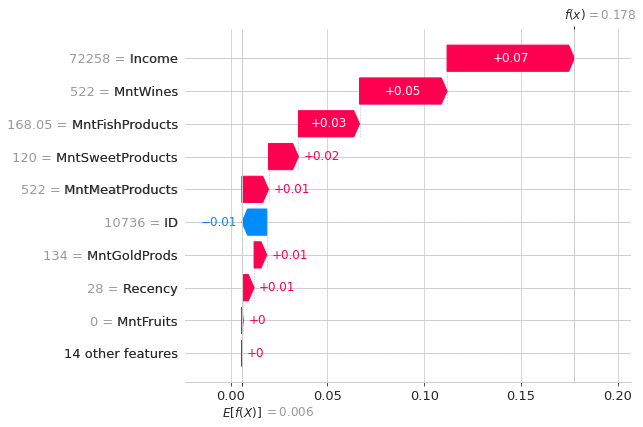

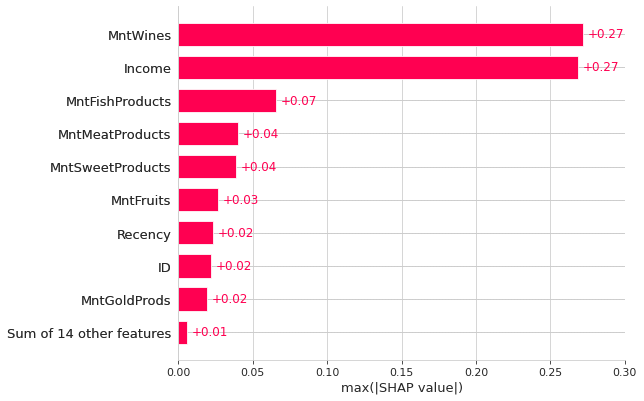

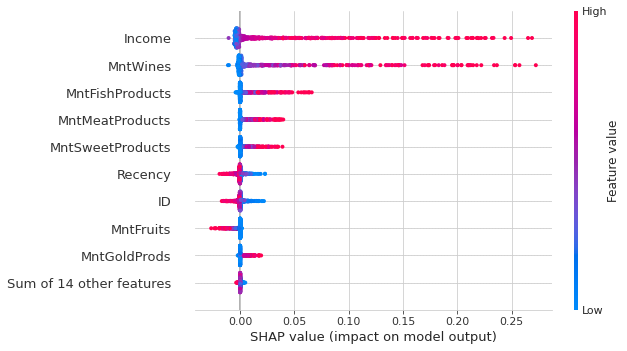

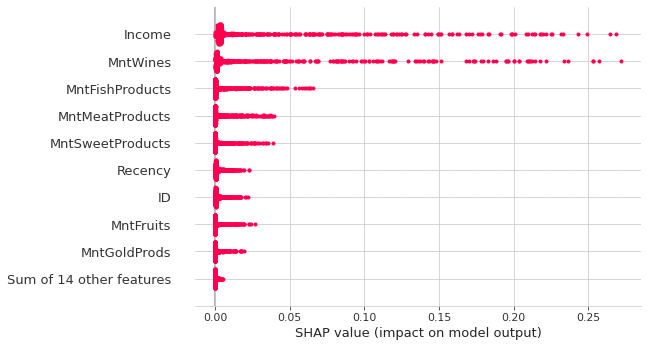

In [460]:
#feature importance of Logistic Regression Model
import shap
f = lambda x: logreg.predict_proba(x)[:,1]
med = x_train.median().values.reshape((1,x_train.shape[1]))

explainer = shap.Explainer(f, med)
shap_values = explainer(x_test.iloc[0:1000,:])
shap.plots.waterfall(shap_values[0])
shap.plots.bar(shap_values.abs.max(0))
shap.plots.beeswarm(shap_values)
shap.plots.beeswarm(shap_values.abs, color="shap_red")

In [469]:
#SVM model
from sklearn.svm import SVC 
svc_model=SVC(kernel='linear')
svc_model.fit(x_train,y_train)
y_pred1=svc_model.predict(x_test)
print('SVM Model Results')
ans = accuracy_score(y_test, y_pred1)
ans = round(ans*100,3)
print('Acurracy score of SVM Model is {ans}'.format(ans=ans))
print('Confusion Matrix')
print(cm)
print(classification_report(y_test,y_pred1))#classification report for svm model prediction
cm=confusion_matrix(y_test, y_pred1)#confusion matrix for the svm model prediction
print(cm)

SVM Model Results
Acurracy score of SVM Model is 93.601
Confusion Matrix
[[624   6]
 [ 37   5]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       630
           1       0.43      0.07      0.12        42

    accuracy                           0.94       672
   macro avg       0.68      0.53      0.54       672
weighted avg       0.91      0.94      0.91       672

[[626   4]
 [ 39   3]]


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

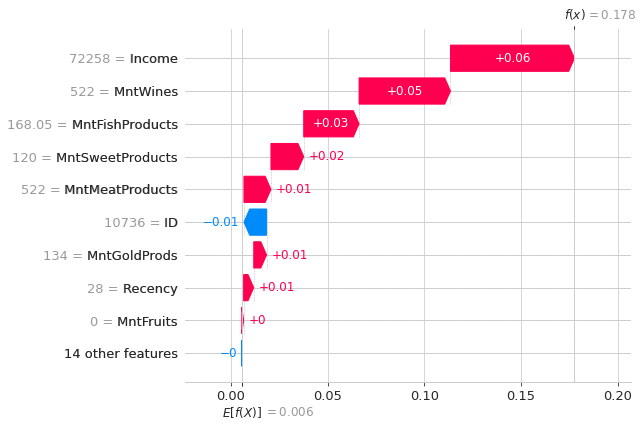

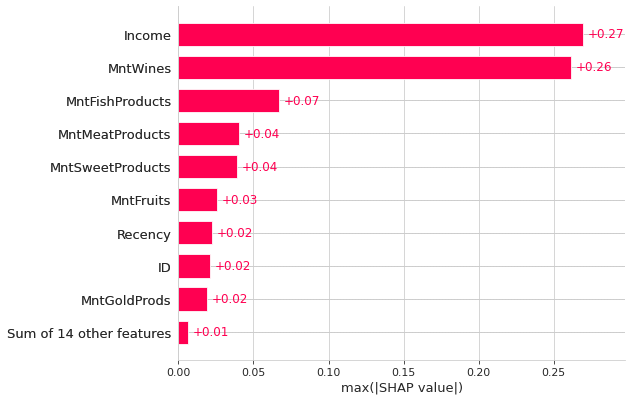

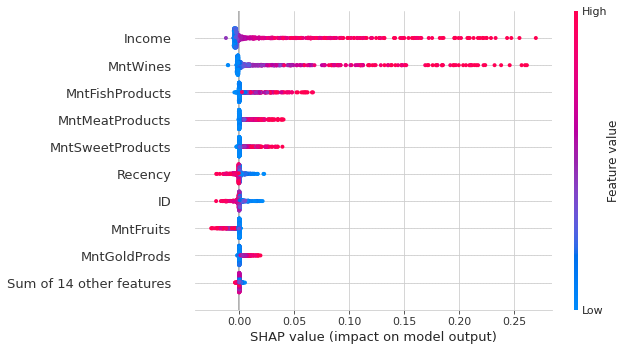

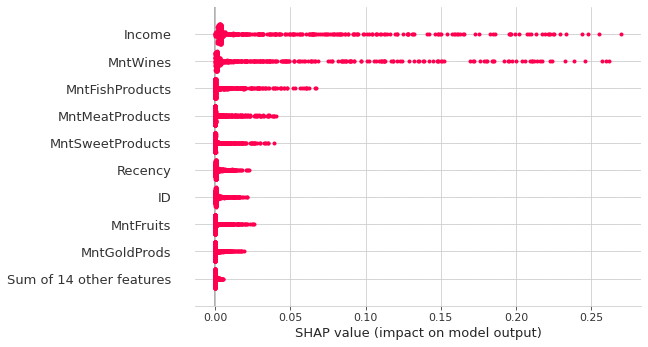

In [465]:
#feature importance of SVM Model
f = lambda x: svc_model.predict_proba(x)[:,1]
med = x_train.median().values.reshape((1,x_train.shape[1]))

explainer = shap.Explainer(f, med)
shap_values = explainer(x_test.iloc[0:1000,:])
shap.plots.waterfall(shap_values[0])
shap.plots.bar(shap_values.abs.max(0))
shap.plots.beeswarm(shap_values)
shap.plots.beeswarm(shap_values.abs, color="shap_red")